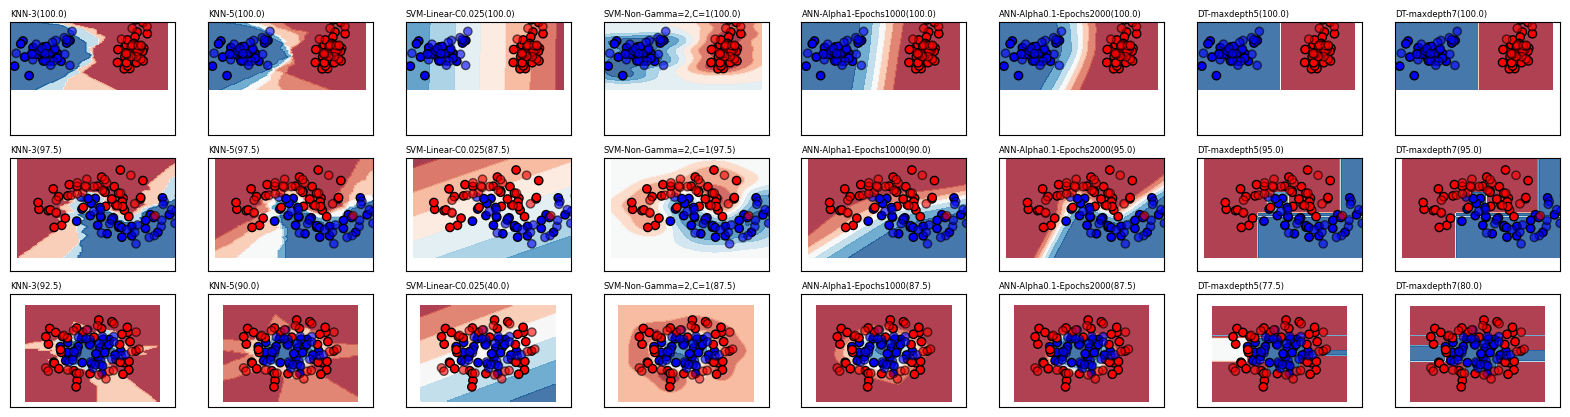

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Datasets for testing
from sklearn.datasets import make_circles, make_classification, make_moons
# Classifiers we know
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Assessment and Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
# Pre-process the data. E.g., normalization
from sklearn.preprocessing import StandardScaler # Gaussian Scaler
from sklearn.pipeline import make_pipeline

classifiers = [
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    MLPClassifier(alpha=0.1, max_iter=2000, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    DecisionTreeClassifier(max_depth=7, random_state=42)
]

names = [
    "KNN-3",
    "KNN-5",
    "SVM-Linear-C0.025",
    "SVM-Non-Gamma=2,C=1",
    "ANN-Alpha1-Epochs1000",
    "ANN-Alpha0.1-Epochs2000",
    "DT-maxdepth5",
    "DT-maxdepth7"
]

datasets = [
    make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class =1),
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1)
]
figure = plt.figure(figsize=(20,5))
counter = 1
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000","#0000FF"])

for datasetIndex, dataset in enumerate(datasets):
  X,y = dataset
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
  for name, clf in zip(names, classifiers):
    ax = plt.subplot(3,8,counter)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
    ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(-2,2.2,f"{name}({score*100})",size=6)
    counter += 1


